In [1]:
import numpy as np
import pandas as pd

from scipy.io import loadmat

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = '../input/andrew_ng/'

In [3]:
data1 = loadmat(PATH+'ex7data1.mat')
data2 = loadmat(PATH+'ex7data2.mat')

faces = loadmat(PATH+'ex7faces.mat')

bird = loadmat(PATH+'bird_small.mat')

img_path = PATH+'bird_small.png'

In [4]:
data1.keys(), data2.keys()

(dict_keys(['__header__', '__version__', '__globals__', 'X']),
 dict_keys(['__header__', '__version__', '__globals__', 'X']))

In [5]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [6]:
def find_closest_centroids(X, centroid):
    m = X.shape[0]
    closest_centroid = np.zeros(m)
    for i in range(m):
        closest_centroid[i] = np.argmin(np.sum(np.square(centroid - X[i,:]), axis=1))
    return closest_centroid

closest_centroids = find_closest_centroids(data2['X'], initial_centroids)

In [7]:
closest_centroids[:3]

array([0., 2., 1.])

In [8]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, 2))
    
    for i in range(K):
        indices = np.where(idx==i)
        centroids[i,:] = np.sum(X[indices,:], 1) / len(indices[0])
    return centroids

K = 3
compute_centroids(data2['X'], closest_centroids, K)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [9]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    idx = np.zeros(m)
    centroids = initial_centroids
    K = initial_centroids.shape[0]
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return idx, centroids

X = data2['X']
idx, centroids = run_k_means(X, initial_centroids, 10)

In [10]:
centroids

array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

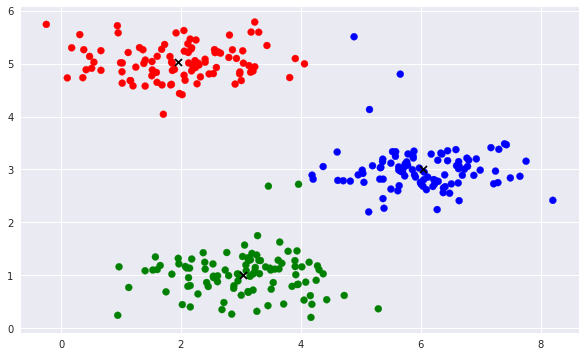

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

colors = ['red', 'green', 'blue']

ax.scatter(data2['X'][:,0], data2['X'][:,1], c=[colors[int(i)] for i in idx])
ax.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x')

In [12]:
# Using sklearn KMeans
kmeans = KMeans(3, random_state=123).fit(data2['X'])

In [13]:
kmeans.cluster_centers_

array([[1.95399466, 5.02557006],
       [6.03366736, 3.00052511],
       [3.04367119, 1.01541041]])

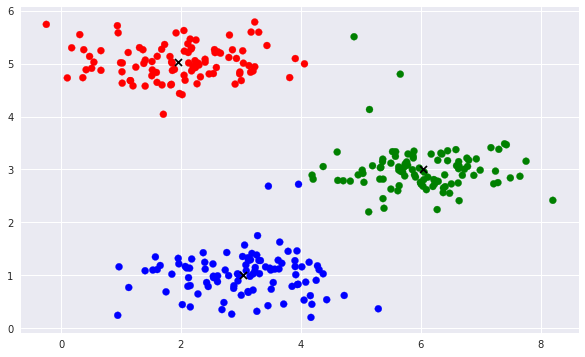

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

colors = ['red', 'green', 'blue']

ax.scatter(data2['X'][:,0], data2['X'][:,1], c=[colors[int(i)] for i in kmeans.labels_])
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='k', marker='x')

### Image Compression

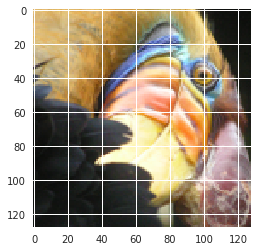

In [15]:
plt.imshow(bird['A'])

In [16]:
bird['A'].shape

(128, 128, 3)

In [17]:
norm_img = bird['A']/255  # normalize

In [18]:
X = norm_img.reshape(128*128, 3)

In [19]:
X.shape

(16384, 3)

In [20]:
kmeans = KMeans(16, random_state=123).fit(X)
new_img = kmeans.cluster_centers_[kmeans.labels_].reshape(128, 128, 3)

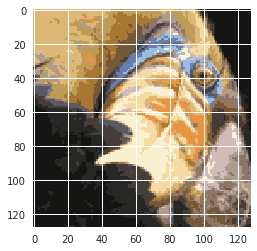

In [21]:
plt.imshow(new_img)  # compressed image

### PCA

In [22]:
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [23]:
data1['X'].shape

(50, 2)

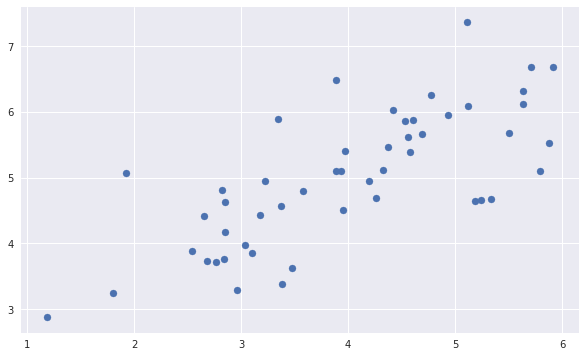

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(data1['X'][:,0], data1['X'][:,1])

In [25]:
X = data1['X']

In [26]:
def pca(X):
    X_norm = StandardScaler().fit(X).transform(X)
    cov = X_norm.T.dot(X_norm)/X.shape[0]
    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [27]:
U, S, V =pca(X)
U, S, V

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.73553038, 0.26446962]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [28]:
def project_data(X, U, K):
    U_reduced = U[:,:K]
    return X.dot(U_reduced)
z = project_data(X, U, 1)

In [29]:
def recover_data(Z, U, K):
    U_reduced = U[:, :K]
    return Z.dot(U_reduced.T)
x_recovered = recover_data(z, U, 1)

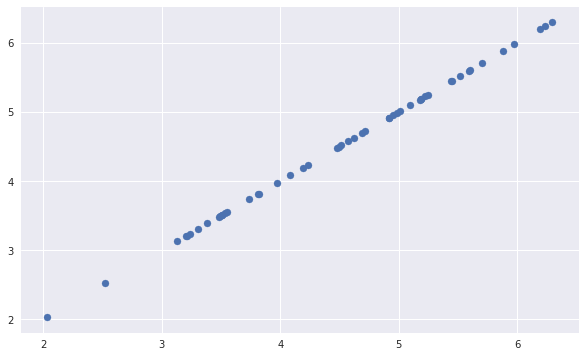

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(x_recovered[:,0], x_recovered[:,0])